##CSE-221710313011-D.Manasa

##Logistic Regression

Problem Statement :
We will be using https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


# In Attorney 0-Not hiring an attorney  and 1-hiring to attorney
# In clmsex 0-male 1-female
# In Seatbelt 0-no seatbelt 1- seatbelt

In [4]:
data.shape

(1340, 7)

In [5]:
## droping the CASENUM column
data.drop(['CASENUM'],axis=1,inplace=True)
data

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [6]:
data.shape

(1340, 6)

In [7]:
data.describe

<bound method NDFrame.describe of       ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0            0     0.0       1.0       0.0    50.0  34.940
1            1     1.0       0.0       0.0    18.0   0.891
2            1     0.0       1.0       0.0     5.0   0.330
3            0     0.0       1.0       1.0    31.0   0.037
4            1     0.0       1.0       0.0    30.0   0.038
...        ...     ...       ...       ...     ...     ...
1335         1     0.0       1.0       0.0     NaN   0.576
1336         0     1.0       1.0       0.0    46.0   3.705
1337         1     1.0       1.0       0.0    39.0   0.099
1338         0     1.0       0.0       0.0     8.0   3.177
1339         1     1.0       1.0       0.0    30.0   0.688

[1340 rows x 6 columns]>

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ATTORNEY,1340.0,0.488806,0.500061,0.0,0.0,0.0000,1.0000,1.000
CLMSEX,1328.0,0.558735,0.496725,0.0,0.0,1.0000,1.0000,1.000
CLMINSUR,1299.0,0.907621,0.289671,0.0,1.0,1.0000,1.0000,1.000
SEATBELT,1292.0,0.017028,0.129425,0.0,0.0,0.0000,0.0000,1.000
CLMAGE,1151.0,28.414422,20.304451,0.0,9.0,30.0000,43.0000,95.000
LOSS,1340.0,3.806307,10.636903,0.0,0.4,1.0695,3.7815,173.604


In [9]:
# Checking for missing values
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
#data['CLMSEX']=data['CLMSEX'].fillna()
#data['CLMINSUR']=data['CLMINSUR'].fillna()

In [12]:
data.CLMSEX.value_counts().index[0]


1.0

##Imputing the missing values:

In [13]:
# Creating a user-defined function for imputing the missing values 
#with mode(numerical and categorical data)
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,10.0,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [14]:
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

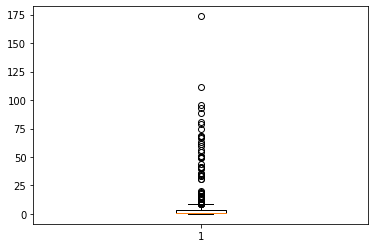

In [15]:
##Loss Column ## Datapoint<Q1-1.5
plt.boxplot(data.LOSS)
plt.show()

##-> Data Entry mistake

Outliers also missing values --> Imputation

Winsorization--> Outliers are replaced with next small value

Example:[1,2,3,4,5,6,.....,9000]--> 9000 as an outlier--> 9000 will be replace with 89

One analysis--> including outliers

One analysis--> drop all the outlier

In [16]:
## Split the data into Input and Output
X = data.iloc[:,1:]
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [17]:
y=data.ATTORNEY
y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [18]:
# Split thedata into training and testing
# Build the model on training data and check the model performance on test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
# Build the classifier on training data
# Sklearn library: import ,instantiate,fit
from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train) # Input and Output will be passes to the fit method

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# Predicting on train data
# Syntax: objectName.predict(Input)
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [21]:
# Confusion matrix for training data
# Confusion matrix(Actual Values,Predicted Values)
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [108, 345]])

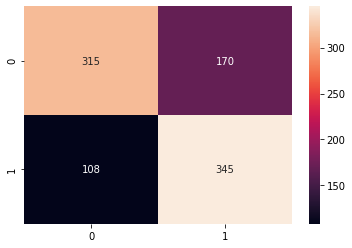

In [22]:
sns.heatmap(conf,annot=True,fmt='3.0f')

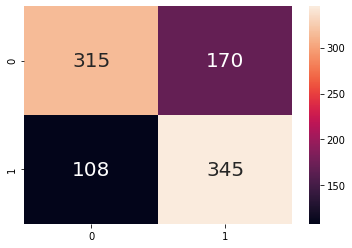

In [23]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [24]:
conf[0][0]

315

In [25]:
conf[0][1]

170

In [26]:
print('true_positive =',conf[0][0])
print('false_positive =',conf[0][1])
print('true_negative =',conf[1][0])
print('false_negative =',conf[1][1])

true_positive = 315
false_positive = 170
true_negative = 108
false_negative = 345


In [28]:
X_train.shape

(938, 5)

In [29]:
X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
744,1.0,1.0,0.0,40.0,5.091
363,1.0,1.0,0.0,46.0,173.604
10,1.0,1.0,0.0,37.0,6.190
971,0.0,1.0,0.0,68.0,9.008
634,1.0,1.0,1.0,10.0,8.053
...,...,...,...,...,...
715,0.0,1.0,0.0,13.0,6.979
905,0.0,1.0,0.0,10.0,3.330
1096,0.0,1.0,0.0,50.0,3.095
235,1.0,1.0,0.0,17.0,1.619


In [30]:
true_positive =conf[0][0]
false_positive =conf[0][1]
false_negative =conf[1][0]
true_negative =conf[1][1]

In [31]:
# Precision Rate
Precision = true_positive/(true_positive+false_positive)
Precision

0.6494845360824743

In [32]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6699029126213593

In [33]:
#Out of all the actual positive values, how many are truly positive
Recall = true_positive/(true_positive+false_negative)
Recall

0.7446808510638298

In [34]:
# Calculation f1-score for the model
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred) #f1_score(Actual Values,Predicted Values)

0.712809917355372

## Prediction on Test Data
## Calculate the metrics for test data--> confusion matrix
## Precision,Recall,F1-Score
## Compare the score with training data

In [35]:
# Make predictions on test data and calculate the precision, recall and f1-score.
from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_test_pred = reg.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[119,  81],
       [ 39, 163]])

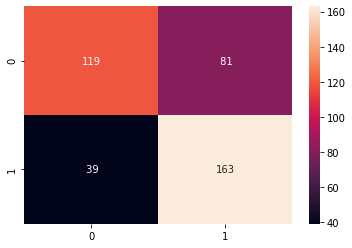

In [38]:
sns.heatmap(conf,annot=True,fmt='3.0f')

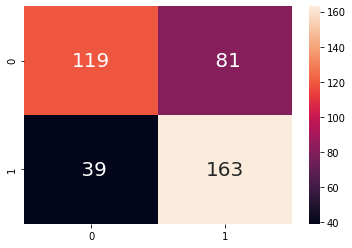

In [39]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [40]:
print('true_positive =',conf[0][0])
print('false_positive =',conf[0][1])
print('true_negative =',conf[1][0])
print('false_negative =',conf[1][1])

true_positive = 119
false_positive = 81
true_negative = 39
false_negative = 163


In [41]:
true_positive =conf[0][0]
false_positive =conf[0][1]
false_negative =conf[1][0]
true_negative =conf[1][1]

In [42]:
accuracy_score(y_test,y_test_pred)

0.7014925373134329

In [43]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred)

0.6680327868852459

In [44]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7531645569620253

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred)

0.7309417040358746

In [46]:
# Find the frequency of categories in the CLMSEX column and plot a graph. Write the observations which category people are more.
data.CLMSEX.value_counts()

1.0    754
0.0    586
Name: CLMSEX, dtype: int64

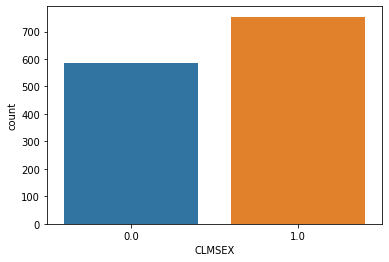

In [47]:
sns.countplot(data.CLMSEX)

##from the above graph:
we can conclude that female's are more than claimants.

In [50]:
#Plot the visualizations of the column CLMAGE and find the pattern in the data like which age group people
#were more as claimants 
data.CLMAGE.describe()

count    1340.000000
mean       25.817164
std        19.879401
min         0.000000
25%        10.000000
50%        17.000000
75%        40.000000
max        95.000000
Name: CLMAGE, dtype: float64

In [51]:
data['CLMRANGE']=pd.cut(data.CLMAGE,bins=[0,10,17,40,95])

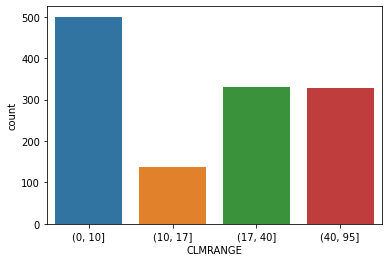

In [52]:
sns.countplot(data.CLMRANGE)

##from the above graph:
0-10 Age group are more thanclaimants

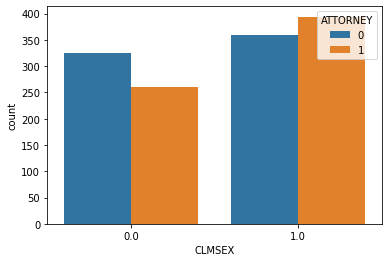

In [53]:
# Visualize how many claimants are going to hire an attorney with respect to CLMSEX i.e., 
#out of male claimants how many will hire an attorney; out of female how many will hire an attorney
sns.countplot(data.CLMSEX,hue=data.ATTORNEY)


##from the above graph:
Female claimants hire the Attorney mostly and Male claimant hire the Attorney lesser times than Female

In [54]:
# Check the correlation of the dataset and visualize it through heatmap
data.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.076564,0.076631,-0.055848,-0.016396,-0.219715
CLMSEX,0.076564,1.000000,0.065976,-0.016327,-0.013789,-0.028412
CLMINSUR,0.076631,0.065976,1.000000,0.019953,0.030389,0.004641
SEATBELT,-0.055848,-0.016327,0.019953,1.000000,-0.018020,0.111879
CLMAGE,-0.016396,-0.013789,0.030389,-0.018020,1.000000,0.051575
LOSS,-0.219715,-0.028412,0.004641,0.111879,0.051575,1.000000


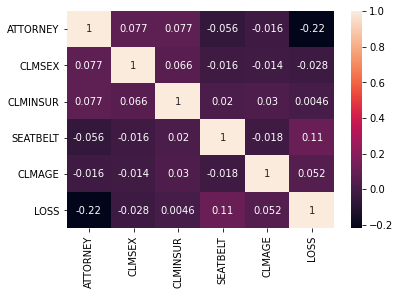

In [55]:
sns.heatmap(data.corr(),annot=True)

In [56]:
# Calculate the number people who did not wear SEATBELT, what is their percentage of hiring attorney 
se=data[data.SEATBELT==0]
se.shape[0]

1318

In [57]:
seat=se[se.ATTORNEY==1]
seat.shape[0]

649

In [58]:
# Percentage of hiring attorney who did not wear SEATBELT
(seat.shape[0]/se.shape[0])*100

49.241274658573595